In [8]:
import  json
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_json("FBI_CrimeData_2016.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579 entries, 0 to 9578
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         9579 non-null   object
 1   State          9579 non-null   object
 2   City           9579 non-null   object
 3   Population     9579 non-null   object
 4   Murder         9579 non-null   int64 
 5   Rape           9579 non-null   int64 
 6   Robbery        9579 non-null   int64 
 7   Assault        9579 non-null   int64 
 8   Burglary       9579 non-null   int64 
 9   Theft          9579 non-null   int64 
 10  Vehicle_Theft  9579 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 823.3+ KB


In [9]:
my_int= ["Murder", "Rape", "Robbery","Assault","Burglary","Theft","Vehicle_Theft" ]
describe = df.describe().T
skew = df[my_int].skew().to_frame(name='skew')
kurt = df[my_int].kurtosis().to_frame(name='kurtosis')

total_describe = pd.concat([describe, skew, kurt], axis=1)
total_describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Murder,9579.0,1.315482,13.081593,0.0,0.0,0.0,0.0,765.0,31.396126,1425.055228
Rape,9579.0,8.775968,57.125403,0.0,0.0,1.0,4.0,2372.0,23.887698,775.256932
Robbery,9579.0,29.139367,304.803589,0.0,0.0,1.0,6.0,15544.0,31.408348,1249.653510
Assault,9579.0,60.900407,511.979781,0.0,1.0,6.0,22.5,30873.0,34.014611,1640.419266
Burglary,9579.0,107.806347,564.724410,0.0,5.0,16.0,57.0,18488.0,17.093620,381.509705
Theft,9579.0,441.419877,2310.369538,0.0,19.0,73.0,279.0,106868.0,22.745682,749.722794
Vehicle_Theft,9579.0,61.320180,436.483170,0.0,1.0,4.0,18.0,18591.0,20.439846,581.477357


In [10]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("my_report_fbi.html")


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report my_report_fbi.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


,Murder
Region,
Midwest,2829
Northeast,2403
South,3038
West,1309


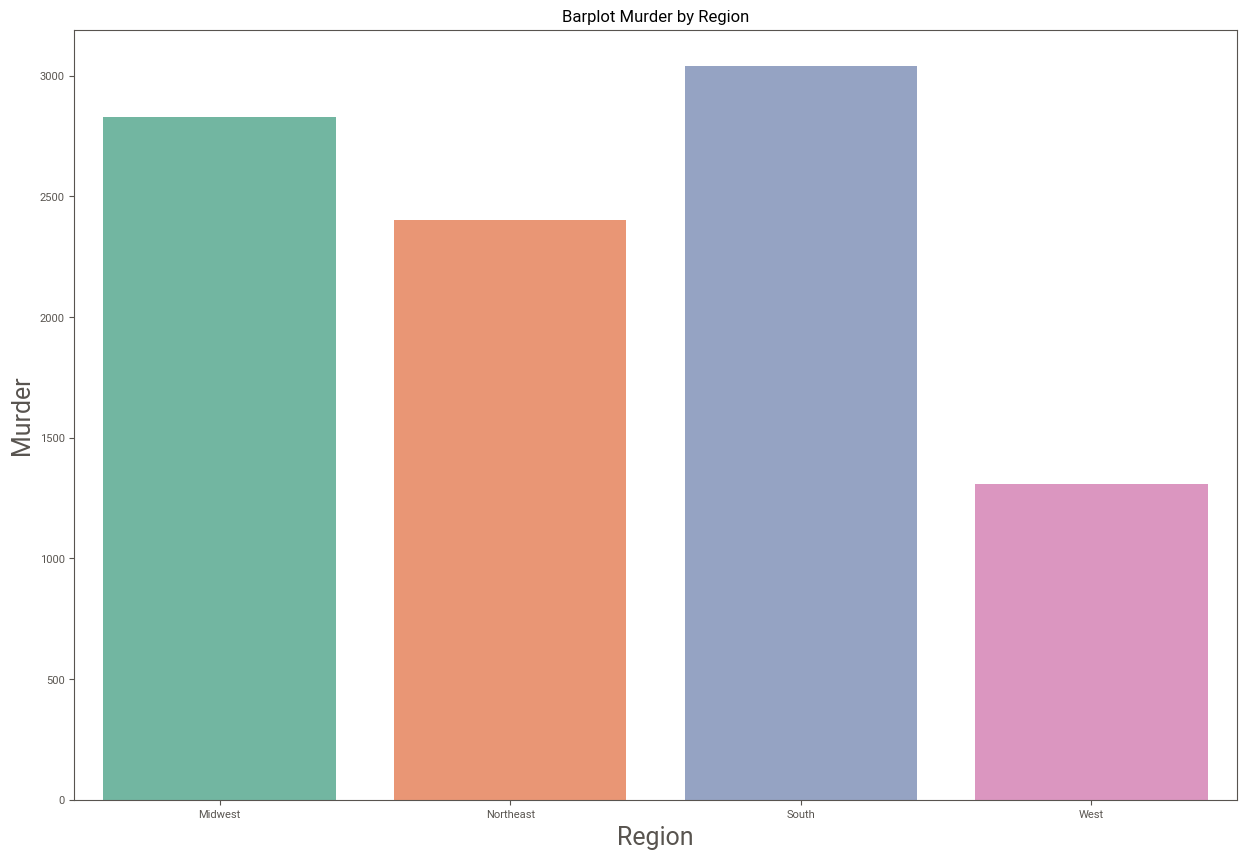

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
murder_by_region = pd.pivot_table(data=df, values="Murder",index="Region",aggfunc='count')
display(murder_by_region)
plt.figure(figsize=(15, 10))
sns.barplot(data=murder_by_region.reset_index(), x="Region", y="Murder", palette='Set2')
plt.xlabel("Region", fontsize=18)
plt.ylabel("Murder", fontsize=18)
plt.title("Barplot Murder by Region")
plt.show();

# violent crimes
For purposes of the project, the crimes murder through assault are considered violent crimes. The remaining three categories are considered non-violent crimes.

In [51]:
violent_crimes_by_region = df.groupby("Region")[["Murder", "Assault"]].sum()
violent_crimes_by_region["violets"]= violent_crimes_by_region.sum(axis= 1)
df_violent_crimes_by_region= violent_crimes_by_region["violets"].reset_index()

df_violent_crimes_by_region


,Region,violets
0,Midwest,131733
1,Northeast,95748
2,South,212259
3,West,156226


,Region,violets
0,Midwest,211854
1,Northeast,156891
2,South,331011
3,West,259401


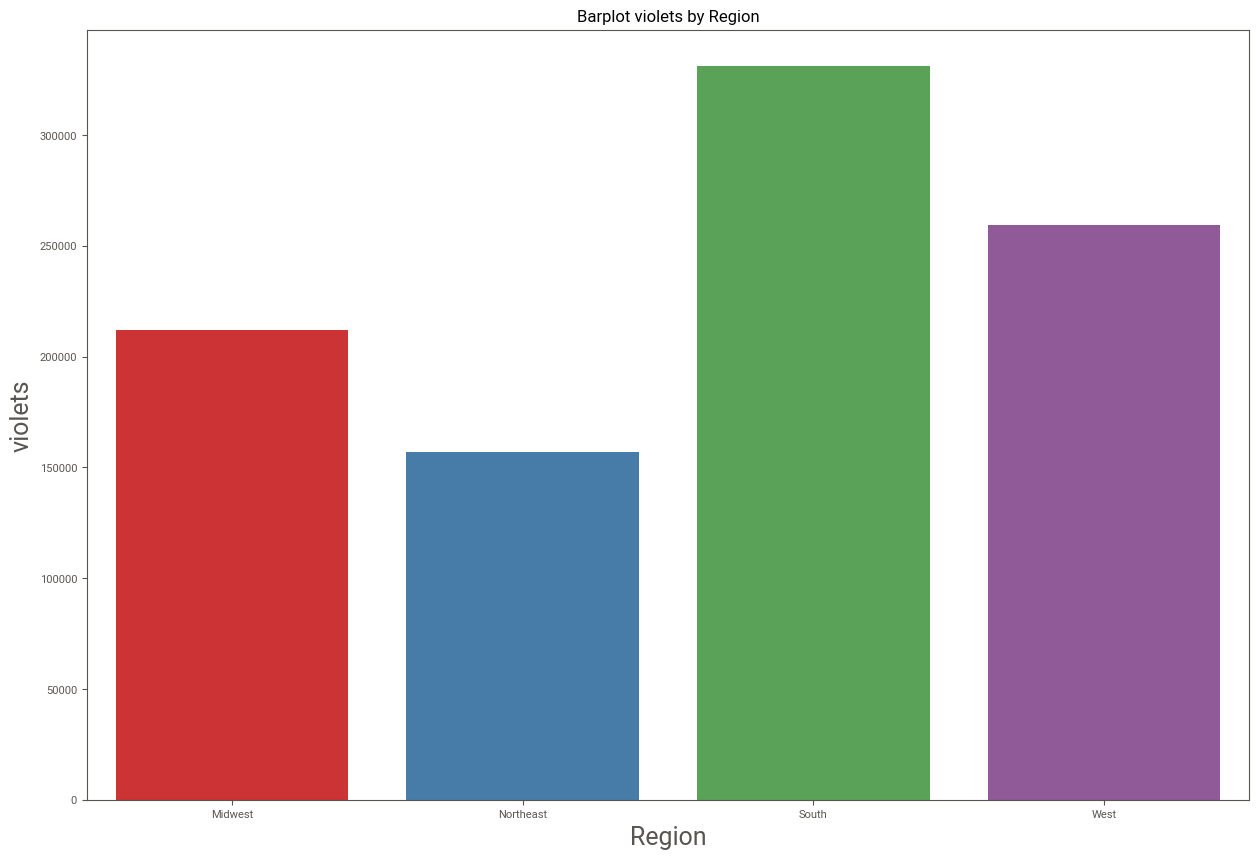

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

violent_crimes_by_region = df.groupby("Region")[["Murder", "Rape", "Robbery", "Assault"]].sum()
violent_crimes_by_region["violets"]= violent_crimes_by_region.sum(axis= 1)
df_violent_crimes_by_region= violent_crimes_by_region["violets"].reset_index()

display(df_violent_crimes_by_region)

plt.figure(figsize=(15, 10))
sns.barplot(data=df_violent_crimes_by_region, x="Region", y="violets",  palette="Set1")
plt.xlabel("Region", fontsize=18)
plt.ylabel("violets", fontsize=18)
plt.title("Barplot violets by Region")
plt.show();

# Non violent crimes

,Region,non_violent
0,Midwest,423708
1,Northeast,313782
2,South,662022
3,West,518802


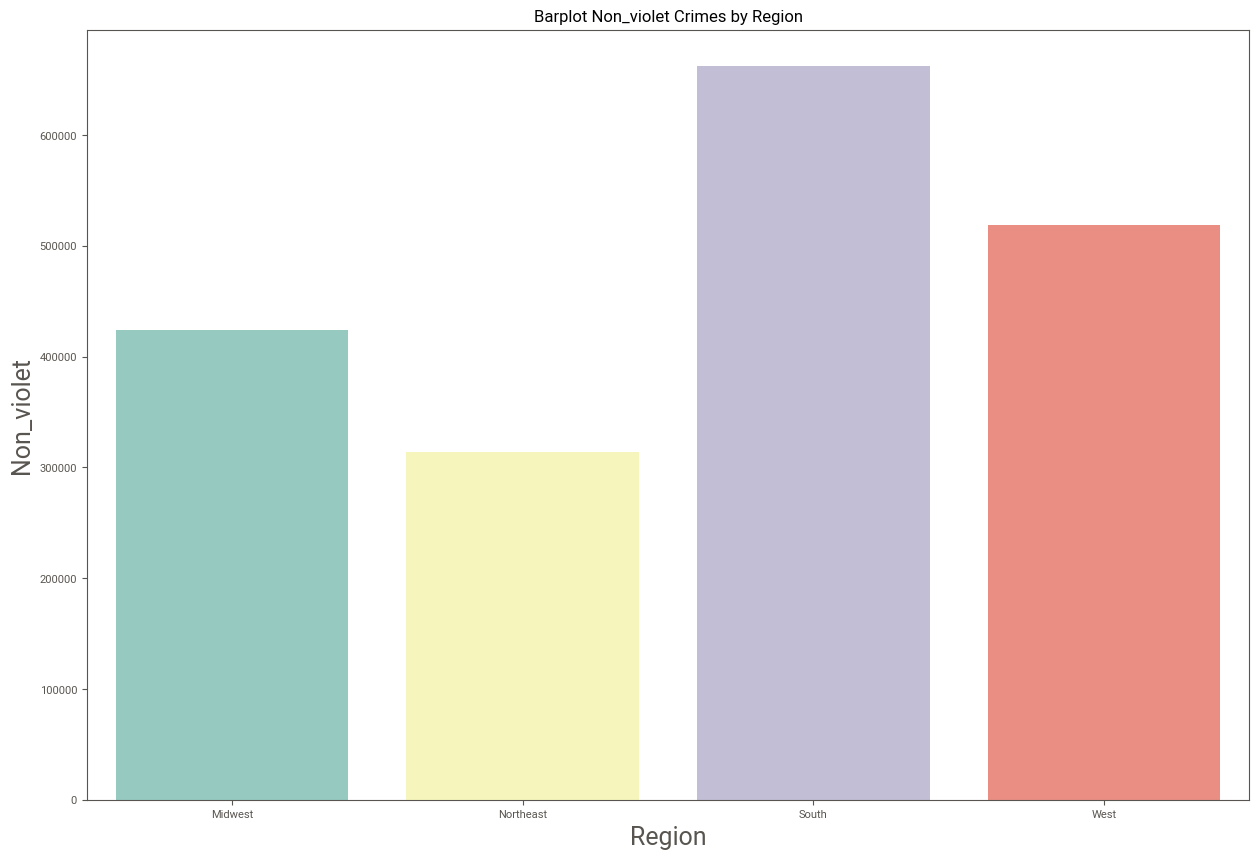

In [88]:
non_violent_crimes_by_region = df.groupby("Region")[["Burglary","Theft","Vehicle_Theft"]].sum()
non_violent_crimes_by_region["non_violent"]= violent_crimes_by_region.sum(axis= 1)
df_non_violent_crimes_by_region= non_violent_crimes_by_region["non_violent"].reset_index()

display(df_non_violent_crimes_by_region)

plt.figure(figsize=(15, 10))
sns.barplot(data=df_non_violent_crimes_by_region, x="Region", y="non_violent",  palette="Set3")
plt.xlabel("Region", fontsize=18)
plt.ylabel("Non_violet", fontsize=18)
plt.title("Barplot Non_violet Crimes by Region")
plt.show();

# tabular mean
A report which is tabular list showing the total violent crimes for each State and the distance from the national mean.

In [71]:
df.columns

Index(['Region', 'State', 'City', 'Population', 'Murder', 'Rape', 'Robbery',
       'Assault', 'Burglary', 'Theft', 'Vehicle_Theft'],
      dtype='object')

In [86]:
national_violent_crimes = df.groupby("State")[["Murder", "Rape", "Robbery", "Assault"]].sum()
national_violent_crimes["violent"]= national_violent_crimes.sum(axis=1)
mean_national= national_violent_crimes["violent"].mean()
print(f"mean of national voilent crimes: {mean_national}")
distance= national_violent_crimes["violent"].reset_index()
distance["difference"]= distance["violent"] - mean_national
distance

mean of national voilent crimes: 18807.0


,State,violent,difference
0,ALABAMA,15350,-3457.0
1,ALASKA,4697,-14110.0
2,ARIZONA,23856,5049.0
3,ARKANSAS,12048,-6759.0
4,CALIFORNIA,145205,126398.0
5,COLORADO,15533,-3274.0
6,CONNECTICUT,7754,-11053.0
7,DELAWARE,2359,-16448.0
8,DISTRICT OF COLUMBIA,7711,-11096.0
9,FLORIDA,50540,31733.0
